In [350]:
import streamlit as st
import pandas as pd
import re
from urlextract import URLExtract
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import emoji
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('Agg')
import plotly.express as px

Validate Regex : https://regex101.com/

# Data Cleaning

In [150]:
# Closing the file in important for preventing data access later and for other programs to access the file also.
f = open("_chat.txt")
data = f.read()
f.close()

In [151]:
data

'[15/12/19, 7:02:32 PM] Movie for every year 😴😴: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[15/12/19, 7:02:32 PM] Nilay 2nd Floor: \u200eNilay 2nd Floor created this group\n[15/12/19, 7:02:32 PM] Movie for every year 😴😴: \u200eYou were added\n[10/04/22, 3:46:11 PM] Ashish Yadav Amity: Bhai bhai koi free hai its urgent 😦\n[10/04/22, 3:46:18 PM] Ashish Yadav Amity: Koi hai bhai 😵\n[10/04/22, 3:47:49 PM] Ritesh Amity: Mai hun bhai\n[10/04/22, 3:48:58 PM] Ashish Yadav Amity: Bhai mere system pe ransomware attack hogya hai\n[10/04/22, 3:49:05 PM] Ashish Yadav Amity: Kya kru ab 😭\n[10/04/22, 3:49:14 PM] Ritesh Amity: Ye kaise ho gaya\n[10/04/22, 3:49:26 PM] Ritesh Amity: Nilay ko call Karo\n[10/04/22, 3:49:30 PM] Ritesh Amity: Mujhe iska idea kam hai\n[10/04/22, 3:49:39 PM] Ashish Yadav Amity: Are yarr crack download kiya tha recovery software ka\n[10/04/22, 3:49:41 PM] Ritesh Amity: Bhai kahin SSD lagwaye 

In [152]:
# For AM, PM Formatted Time
pattern = "\[\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}:\d{1,2}\s[APap][Mm]\]\s"

In [153]:
message = re.split(pattern, data)[1:]

In [154]:
message

['Movie for every year 😴😴: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 'Nilay 2nd Floor: \u200eNilay 2nd Floor created this group\n',
 'Movie for every year 😴😴: \u200eYou were added\n',
 'Ashish Yadav Amity: Bhai bhai koi free hai its urgent 😦\n',
 'Ashish Yadav Amity: Koi hai bhai 😵\n',
 'Ritesh Amity: Mai hun bhai\n',
 'Ashish Yadav Amity: Bhai mere system pe ransomware attack hogya hai\n',
 'Ashish Yadav Amity: Kya kru ab 😭\n',
 'Ritesh Amity: Ye kaise ho gaya\n',
 'Ritesh Amity: Nilay ko call Karo\n',
 'Ritesh Amity: Mujhe iska idea kam hai\n',
 'Ashish Yadav Amity: Are yarr crack download kiya tha recovery software ka\n',
 'Ritesh Amity: Bhai kahin SSD lagwaye the un logon ne kuchh to nahi kiya\n',
 'Ritesh Amity: Are bhai 🤦🏻\u200d♂️\n',
 'Ashish Yadav Amity: Bhai pata nhi yarr\n',
 'Ritesh Amity: Kya aa raha hai?\n',
 'Ashish Yadav Amity: Bhai google account log out kr de rha bar bar\n',
 'Rit

In [155]:
dates = re.findall(pattern, data)

In [156]:
dates

['[15/12/19, 7:02:32 PM] ',
 '[15/12/19, 7:02:32 PM] ',
 '[15/12/19, 7:02:32 PM] ',
 '[10/04/22, 3:46:11 PM] ',
 '[10/04/22, 3:46:18 PM] ',
 '[10/04/22, 3:47:49 PM] ',
 '[10/04/22, 3:48:58 PM] ',
 '[10/04/22, 3:49:05 PM] ',
 '[10/04/22, 3:49:14 PM] ',
 '[10/04/22, 3:49:26 PM] ',
 '[10/04/22, 3:49:30 PM] ',
 '[10/04/22, 3:49:39 PM] ',
 '[10/04/22, 3:49:41 PM] ',
 '[10/04/22, 3:49:48 PM] ',
 '[10/04/22, 3:49:55 PM] ',
 '[10/04/22, 3:50:06 PM] ',
 '[10/04/22, 3:50:21 PM] ',
 '[10/04/22, 3:50:53 PM] ',
 '[10/04/22, 3:51:03 PM] ',
 '[10/04/22, 3:51:25 PM] ',
 '[10/04/22, 3:51:56 PM] ',
 '[10/04/22, 3:54:30 PM] ',
 '[10/04/22, 3:54:52 PM] ',
 '[10/04/22, 3:55:15 PM] ',
 '[10/04/22, 3:55:29 PM] ',
 '[10/04/22, 3:57:39 PM] ',
 '[10/04/22, 3:57:47 PM] ',
 '[10/04/22, 3:58:06 PM] ',
 '[10/04/22, 3:59:50 PM] ',
 '[10/04/22, 4:00:15 PM] ',
 '[10/04/22, 4:00:16 PM] ',
 '[10/04/22, 4:00:41 PM] ',
 '[10/04/22, 4:00:48 PM] ',
 '[10/04/22, 4:01:06 PM] ',
 '[10/04/22, 4:01:07 PM] ',
 '[10/04/22, 4:01:19

In [157]:
df = pd.DataFrame({'user_message':message, 'date':dates})

- %d matches the day of the month.
- %m matches the month.
- %y matches the two-digit year.
- %I matches the hour (12-hour clock).
- %M matches the minutes.
- %S matches the seconds.
- %p matches "AM" or "PM" in a case-insensitive manner.

In [158]:
df['date'] = pd.to_datetime(df['date'],format='[%d/%m/%y, %I:%M:%S %p] ')

In [159]:
df

,user_message,date
0,Movie for every year 😴😴: ‎Messages and calls a...,2019-12-15 19:02:32
1,Nilay 2nd Floor: ‎Nilay 2nd Floor created this...,2019-12-15 19:02:32
2,Movie for every year 😴😴: ‎You were added\n,2019-12-15 19:02:32
3,Ashish Yadav Amity: Bhai bhai koi free hai its...,2022-04-10 15:46:11
4,Ashish Yadav Amity: Koi hai bhai 😵\n,2022-04-10 15:46:18
...,...,...
17879,Aayush: Agle week tk rhoge kya\n,2023-10-02 10:32:43
17880,Ashish Yadav Amity: Haa next Sunday Tak hu\n,2023-10-02 10:58:38
17881,Ashish Yadav Amity: 😁✌🏻\n,2023-10-02 10:58:40
17882,Aayush: 👍👍\n,2023-10-02 11:44:57


In [160]:
df.shape

(17884, 2)

In [161]:
# Separting user and message
users = []
messages = []
for message in df['user_message']:
    line = re.split('([\w\W]+?):\s', message)
    users.append(line[1])
    messages.append(line[2])
df['user'] = users
df['message'] = messages
df.drop(columns='user_message', inplace=True)

In [162]:
df.head()

,date,user,message
0,2019-12-15 19:02:32,Movie for every year 😴😴,‎Messages and calls are end-to-end encrypted. ...
1,2019-12-15 19:02:32,Nilay 2nd Floor,‎Nilay 2nd Floor created this group\n
2,2019-12-15 19:02:32,Movie for every year 😴😴,‎You were added\n
3,2022-04-10 15:46:11,Ashish Yadav Amity,Bhai bhai koi free hai its urgent 😦\n
4,2022-04-10 15:46:18,Ashish Yadav Amity,Koi hai bhai 😵\n


In [163]:
df.isnull().sum()

date       0
user       0
message    0
dtype: int64

In [164]:
#Extracting Years, Months, Days
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [165]:
df

,date,user,message,year,month,day,hour,minute
0,2019-12-15 19:02:32,Movie for every year 😴😴,‎Messages and calls are end-to-end encrypted. ...,2019,December,15,19,2
1,2019-12-15 19:02:32,Nilay 2nd Floor,‎Nilay 2nd Floor created this group\n,2019,December,15,19,2
2,2019-12-15 19:02:32,Movie for every year 😴😴,‎You were added\n,2019,December,15,19,2
3,2022-04-10 15:46:11,Ashish Yadav Amity,Bhai bhai koi free hai its urgent 😦\n,2022,April,10,15,46
4,2022-04-10 15:46:18,Ashish Yadav Amity,Koi hai bhai 😵\n,2022,April,10,15,46
...,...,...,...,...,...,...,...,...
17879,2023-10-02 10:32:43,Aayush,Agle week tk rhoge kya\n,2023,October,2,10,32
17880,2023-10-02 10:58:38,Ashish Yadav Amity,Haa next Sunday Tak hu\n,2023,October,2,10,58
17881,2023-10-02 10:58:40,Ashish Yadav Amity,😁✌🏻\n,2023,October,2,10,58
17882,2023-10-02 11:44:57,Aayush,👍👍\n,2023,October,2,11,44


In [166]:
# Removeing Group Name it's alays at postion 0
users_list = df["user"].unique().tolist()
if len(users_list) > 2:
    users_list.remove(users_list[0])
print(users_list)

['Nilay 2nd Floor', 'Ashish Yadav Amity', 'Ritesh Amity', 'Aayush', '\u200eYou']


# Exploratory Data Analysis

In [167]:
users_list = df["user"].unique().tolist()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17884 entries, 0 to 17883
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     17884 non-null  datetime64[ns]
 1   user     17884 non-null  object        
 2   message  17884 non-null  object        
 3   year     17884 non-null  int32         
 4   month    17884 non-null  object        
 5   day      17884 non-null  int32         
 6   hour     17884 non-null  int32         
 7   minute   17884 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(3)
memory usage: 838.4+ KB


In [169]:
selected_user = 'Aayush'

In [170]:
len(df[df["user"] == selected_user]["message"])

4320

In [171]:
words = []
for word in df[df["user"]==selected_user]["message"]:
    for i in word.split():
        words.append(i)
num_words = len(words)
num_words

18757

- media shared in group

In [172]:
df[df["message"].str.contains(r'omitted',case=False, regex=True)]["message"].value_counts().reset_index().head(10)

,message,count
0,‎sticker omitted\n,645
1,‎image omitted\n‎,596
2,‎image omitted\n,579
3,‎sticker omitted\n‎,515
4,‎video omitted\n,78
5,‎GIF omitted\n,64
6,‎video omitted\n‎,43
7,‎GIF omitted\n‎,40
8,‎audio omitted\n,5
9,‎Contact card omitted\n,4


In [173]:
df[df["message"].str.contains(r'omitted',case=False, regex=True)]["message"].value_counts().sum()

2596

- most active users

In [221]:
active_users = df["user"].value_counts()[df["user"].value_counts()>10].reset_index()

In [222]:
active_users

,user,count
0,Nilay 2nd Floor,5712
1,Ashish Yadav Amity,4760
2,Aayush,4320
3,Ritesh Amity,3082


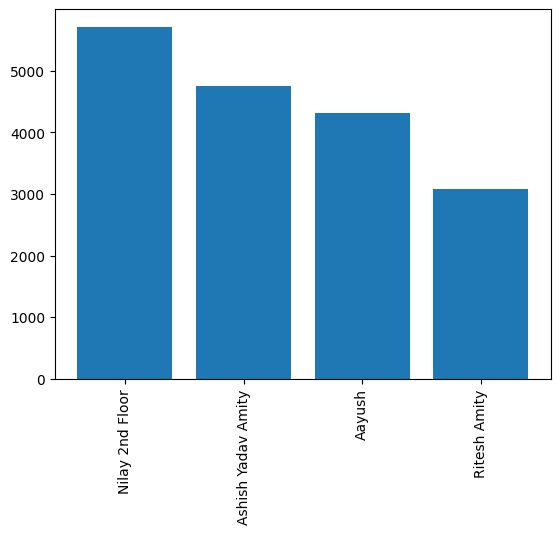

In [286]:
active_plot = plt.bar(active_users["user"], active_users["count"])
plt.xticks(rotation="vertical")
plt.show()

Conclusion: Most active user in Nilay

- msg based on percent

In [270]:
overall_active_user_df = round(df["user"].value_counts()[df["user"].value_counts()>10]/df.shape[0]*100).reset_index().rename(columns={'user':'Name', 'count':'Percent'})
overall_active_user_df

,Name,Percent
0,Nilay 2nd Floor,32.0
1,Ashish Yadav Amity,27.0
2,Aayush,24.0
3,Ritesh Amity,17.0


([0, 1, 2, 3],
 [Text(0, 0, 'Nilay 2nd Floor'),
  Text(1, 0, 'Ashish Yadav Amity'),
  Text(2, 0, 'Aayush'),
  Text(3, 0, 'Ritesh Amity')])

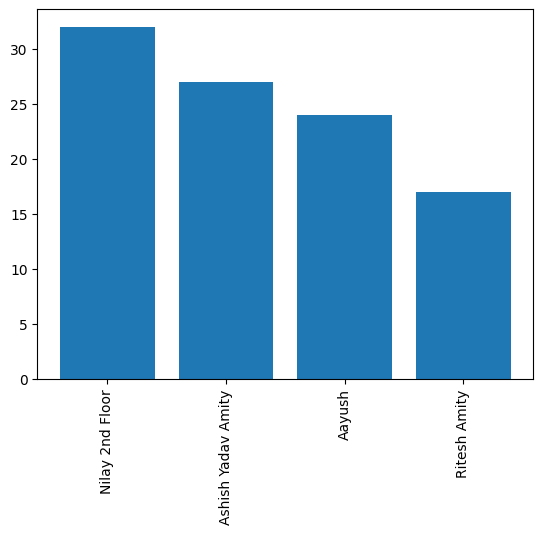

In [273]:
plt.bar(overall_active_user_df["Name"],overall_active_user_df["Percent"])
plt.xticks(rotation='vertical')

- Nilay has 32 percent countribution

- wordcloud

In [340]:
text_data = df['message'].str.cat(sep=' ')

In [318]:
stopwords_file = open('stopwords.txt')
stopwords = stopwords_file.read()
stopwords_file.close()
all_stopwords = ['omitted', 'sticker', 'image', 'image image', 'sticker sticker', 'https'] + stopwords.split()
# all_stopwords

In [347]:
# text_data = re.sub('[^a-zA-Z ]', '', text_data)
filtered_text_data = []
for word in text_data.split():
    if word.lower() not in all_stopwords:
        filtered_text_data.append(word)
filtered_text_data = " ".join(filtered_text_data)


In [348]:
filtered_text_data

'Messages calls endtoend encrypted chat WhatsApp read listen Nilay Floor created group added free urgent system ransomware attack hogya kru Nilay call idea yarr crack download recovery software SSD lagwaye yarr aa google account kr bar bar Achha password change yhi krta kru Important files isolate bahar laptop reset tarika laptop internet disconnect router password change krta der wifi hotspot Kr Ghr wifi bnd krdu koshish der phone password change rahega band doge taaki firse internet connect change krke band kr deta Defender deep scan Haa kr online tk problem Trojan Crack cmd khul gya uspe execute Trojan system direct kr ransomeware execute disconnected clear mtlb data tumne install windows dubara lrna laptop format lena precaution Call windows udao Trojan sbse badi khasiyat detection time shaant hokar baith jaata detect agr tumhe lg trojan hatt galat lg httpssupporthpcomusendriversselfservicehppavilioncdxconvertiblepcmodel ransom detect kr defender Remove kr laptop clean kr lena free

In [356]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_data)

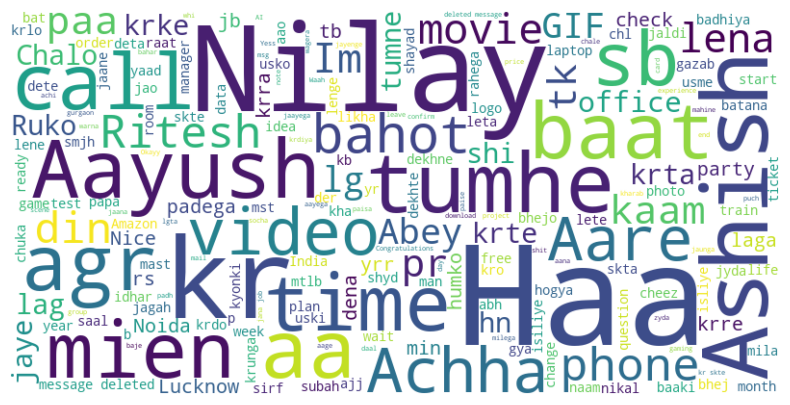

In [357]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [358]:
word_frequencies = wordcloud.words_

In [359]:
df2 = pd.DataFrame(word_frequencies.items())

In [360]:
df2.rename(columns={0:'Word',1:'Freq%'}, inplace=True)
df2['Freq%'] = round(df2['Freq%'] * 100,2)

In [361]:
df2

,Word,Freq%
0,Haa,100.00
1,Nilay,71.51
2,kr,61.71
3,Ashish,38.84
4,tumhe,31.58
...,...,...
195,price,5.08
196,job,5.08
197,jaayega,4.90
198,Okayy,4.90
